In [1]:
import pandas as pd

print(pd.__file__)

df = pd.read_csv("./heart.csv")

/Users/taktakro/Desktop/DeepLearningProjects/venv3.12/lib/python3.12/site-packages/pandas/__init__.py


In [2]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Preprocessing

In [4]:
x = df.drop("HeartDisease", axis="columns")
y = df["HeartDisease"]

In [5]:
x.shape

(918, 11)

In [6]:
y.shape

(918,)

In [7]:
from sklearn.preprocessing import LabelEncoder

x = x.apply(LabelEncoder().fit_transform)

In [8]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state=42)

In [14]:
x_train.shape

(734, 11)

In [15]:
x_test.shape

(184, 11)

In [17]:
# ead data from dataframe
x_train.iloc[0]

Age                14
Sex                 1
ChestPainType       2
RestingBP          22
Cholesterol        98
FastingBS           1
RestingECG          1
MaxHR             116
ExerciseAngina      0
Oldpeak            18
ST_Slope            0
Name: 795, dtype: int64

In [18]:
import numpy as np

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
x_train[0]

array([ 14,   1,   2,  22,  98,   1,   1, 116,   0,  18,   0])

In [20]:
x_test[0]

array([ 35,   0,   1,  41,  53,   0,   1, 105,   0,  10,   2])

In [21]:
from sklearn.preprocessing import MinMaxScaler

scalar =MinMaxScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)


In [22]:
x_train[0]

array([0.27083333, 1.        , 0.66666667, 0.33333333, 0.44343891,
       1.        , 0.5       , 0.98305085, 0.        , 0.34615385,
       0.        ])

In [23]:
x_test[0]

array([0.70833333, 0.        , 0.33333333, 0.62121212, 0.239819  ,
       0.        , 0.5       , 0.88983051, 0.        , 0.19230769,
       1.        ])

# Model definition

In [44]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.18.0
3.7.0


In [38]:
model = keras.Sequential()

model.add(keras.layers.Input(shape=(11,)))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(.5))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dense(units=1, activation="sigmoid"))
# BinaryCrossentropy
model.compile(tf.optimizers.Adam(), loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,201 (200.00 KB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#128*(features+bias)
128*12

1536

In [40]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5311 - loss: 0.6755 - val_accuracy: 0.5978 - val_loss: 0.6313
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5811 - loss: 0.6357 - val_accuracy: 0.8152 - val_loss: 0.5648
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7517 - loss: 0.5546 - val_accuracy: 0.8152 - val_loss: 0.4883
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8119 - loss: 0.4859 - val_accuracy: 0.7609 - val_loss: 0.4577
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8179 - loss: 0.4347 - val_accuracy: 0.7880 - val_loss: 0.4397
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8335 - loss: 0.3969 - val_accuracy: 0.8098 - val_loss: 0.4468
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8449 - loss: 0.4125 - val_accuracy: 0.8152 - val_loss: 0.4302
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8406 - loss: 0.3845 - val_accuracy: 0.8315 - val_loss: 0.3965

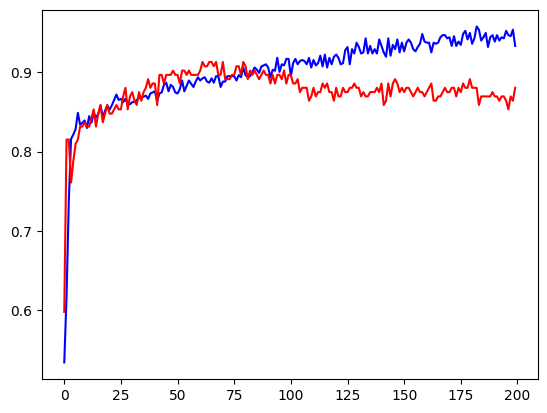

In [42]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')

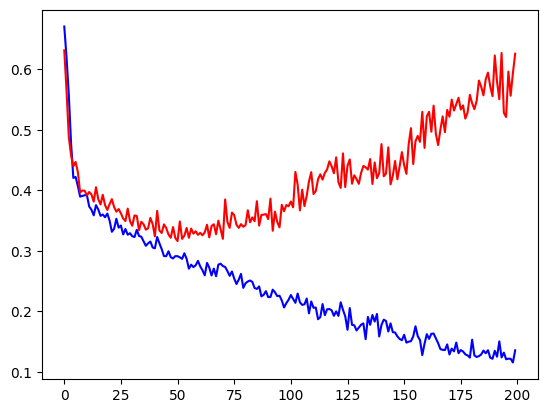

In [43]:
plt.plot(hist.history["loss"], color='blue')
plt.plot(hist.history['val_loss'], color='red')